In [1]:
import os
script_name = 'run_script.ipynb'
dir_path = os.path.dirname(os.path.realpath(script_name))
parent_path = os.path.dirname(dir_path)
savemodel_path = os.path.join(parent_path,'model')
loaddata_path = os.path.join(parent_path,'data')
headfile_path = os.path.join(parent_path,'headfile')

In [2]:
import sys
sys.path.append(savemodel_path)
sys.path.append(loaddata_path)
sys.path.append(headfile_path)

In [3]:
from load_data import TOF_SM_Dataset,ToTensor
from build_network import TEST_NET_1,FULLY_CONV_NET
from model_utils import load_model,save_model
from run_network import train, test,train_onebyone
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2 as cv
import os
from torch import nn, optim
from torchvision import transforms, utils
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from skimage.measure import compare_ssim as ssim
import csv
import time
%matplotlib inline

In [4]:
path = os.path.join(loaddata_path,'tr_dataset_10um_50')
input_channel = 50
batch_size = 32
training_dataset = TOF_SM_Dataset(path, dataset_type = 'single',
                                  input_name='input',output_name='output', 
                                  transform=ToTensor())
training_dataloader = DataLoader(training_dataset, batch_size=batch_size,shuffle=True, num_workers=6)
training_datasize = len(training_dataset)
print(training_datasize)

2000


In [5]:
device = torch.device("cuda:1")

In [6]:
model = FULLY_CONV_NET(input_channel)
model.to(device)

criterion = nn.MSELoss()
lr_init = 1e-6
lr = lr_init
lr_stop = 1e-8
lr_decay = 0.1
optimizer = optim.Adam(model.parameters(), lr=lr)
num_epochs = 10000

In [7]:
NET_NAME = 'FULLY_CONV_NET'
dirname = 'inputs_'+str(input_channel)+'dataset_'+str(training_datasize)+'_'+NET_NAME
if not os.path.exists(os.path.join(savemodel_path,dirname)):
    os.makedirs(os.path.join(savemodel_path,dirname))
    
loss_store = []
loss_comparison_len = 1500
start_ratio = 10
start_time = time.time()
for epoch in range(num_epochs):
    tmp_loss = train_onebyone(training_dataloader,model,criterion, optimizer,device)
    tmp_loss = tmp_loss.data[0]
    if len(loss_store) > start_ratio*loss_comparison_len:
        if np.mean(loss_store[-1*loss_comparison_len:]) < tmp_loss:
            loss_store = []
            lr = lr*lr_decay
            if lr < lr_stop:
                print('converge!!!!!!')
                break
            optimizer = optim.Adam(model.parameters(), lr=lr)
#         else:
    loss_store.append(tmp_loss)
    if epoch < 100: 
        print('Epoch[{}/{}], loss: {:.6f}, time elapsed: {:.2f}'
                  .format(epoch+1, num_epochs, tmp_loss, time.time()-start_time))
    elif (epoch+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}, time elapsed: {:.2f}'
                  .format(epoch+1, num_epochs, tmp_loss, time.time()-start_time))
    if (epoch+1) % 500 == 0:
        filename = 'inputs_'+str(input_channel)+'dataset_'+str(training_datasize)+'epoch_'+str(epoch)+'_'+NET_NAME+'.pth'
        save_model(model, optimizer, path = os.path.join(savemodel_path,dirname), filename=filename) 

Epoch[1/10000], loss: 36.955791, time elapsed: 15.82


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


Epoch[2/10000], loss: 14.551384, time elapsed: 31.68
Epoch[3/10000], loss: 11.286603, time elapsed: 49.42
Epoch[4/10000], loss: 7.951344, time elapsed: 64.44
Epoch[5/10000], loss: 5.128101, time elapsed: 81.06
Epoch[6/10000], loss: 3.863579, time elapsed: 96.61
Epoch[7/10000], loss: 3.164152, time elapsed: 112.96
Epoch[8/10000], loss: 3.175902, time elapsed: 129.69
Epoch[9/10000], loss: 2.575719, time elapsed: 145.82
Epoch[10/10000], loss: 2.668738, time elapsed: 161.85
Epoch[11/10000], loss: 2.216681, time elapsed: 177.28
Epoch[12/10000], loss: 2.107704, time elapsed: 193.32
Epoch[13/10000], loss: 1.951854, time elapsed: 210.90
Epoch[14/10000], loss: 1.775623, time elapsed: 228.01
Epoch[15/10000], loss: 1.687717, time elapsed: 245.93
Epoch[16/10000], loss: 1.432498, time elapsed: 261.30
Epoch[17/10000], loss: 1.654369, time elapsed: 278.65
Epoch[18/10000], loss: 1.384999, time elapsed: 297.24
Epoch[19/10000], loss: 1.415772, time elapsed: 312.89
Epoch[20/10000], loss: 1.637028, time e

Epoch[3200/10000], loss: 0.018095, time elapsed: 54172.03
Epoch[3300/10000], loss: 0.016701, time elapsed: 55859.60
Epoch[3400/10000], loss: 0.013681, time elapsed: 57562.93
Epoch[3500/10000], loss: 0.014477, time elapsed: 59251.21
model saved as/home/weixin/Documents/DeepLearning/Tensorflow_sample/2018summer/deconvolution/model/inputs_50dataset_2000_FULLY_CONV_NET/inputs_50dataset_2000epoch_3499_FULLY_CONV_NET.pth
Epoch[3600/10000], loss: 0.014788, time elapsed: 60938.55
Epoch[3700/10000], loss: 0.012491, time elapsed: 62639.74
Epoch[3800/10000], loss: 0.012644, time elapsed: 64334.19
Epoch[3900/10000], loss: 0.013158, time elapsed: 66024.66
Epoch[4000/10000], loss: 0.010490, time elapsed: 67745.16
model saved as/home/weixin/Documents/DeepLearning/Tensorflow_sample/2018summer/deconvolution/model/inputs_50dataset_2000_FULLY_CONV_NET/inputs_50dataset_2000epoch_3999_FULLY_CONV_NET.pth
Epoch[4100/10000], loss: 0.010396, time elapsed: 69443.43
Epoch[4200/10000], loss: 0.012235, time elapse

In [8]:
filename = 'inputs_'+str(input_channel)+'dataset_'+str(training_datasize)+'epoch_'+str(epoch)+'_'+NET_NAME+'.pth'
save_model(model, optimizer, path = os.path.join(savemodel_path,dirname), filename=filename) 

model saved as/home/weixin/Documents/DeepLearning/Tensorflow_sample/2018summer/deconvolution/model/inputs_50dataset_2000_FULLY_CONV_NET/inputs_50dataset_2000epoch_9999_FULLY_CONV_NET.pth


In [9]:
# train(train_loader=training_dataloader,model=model,criterion=criterion, optimizer=optimizer, num_epochs=num_epochs,
#       device=device, path = savemodel_path, input_channel=input_channel,training_datasize=training_datasize,NET_NAME='TEST_NET_1')

In [10]:
test_path = os.path.join(loaddata_path,'t_dataset_10um_50')
testing_dataset = TOF_SM_Dataset(test_path, dataset_type = 'single',input_name='input',output_name='output',transform=ToTensor())
testing_datasize = len(testing_dataset)
testing_dataloader = DataLoader(testing_dataset, batch_size=testing_datasize,shuffle=False, num_workers=1)

In [11]:
predict_test,gt_test = test(testing_dataloader,model,device)

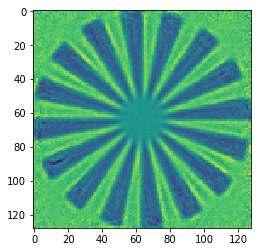

In [12]:
plt.imshow(predict_test[1,0])

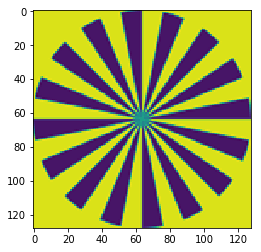

In [13]:
plt.imshow(gt_test[1,0])

In [14]:
lr

1e-06

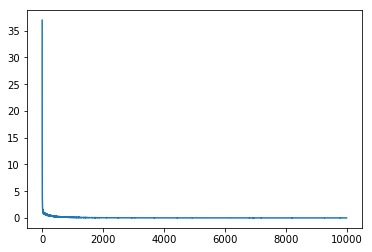

In [15]:
plt.plot(loss_store)

In [16]:
len(loss_store)

10000

In [17]:
start_time = time.time()
print(time.time()-start_time)

3.0994415283203125e-05


In [18]:
def normalize_image(img):
    return img/(img.max()-img.min())*255

In [20]:
def save_result(save_path,input_num,gt_test):
    filepath = os.path.join(save_path,input_num)
    if not os.path.exists(filepath):
        os.makedirs(filepath)
    for i in range(4):
        filename = 'test_gt_'+str(i)+'.png'
        cv.imwrite(os.path.join(filepath,filename),normalize_image(gt_test[i,0]))
#         psnr_value.append('%.4f' % psnr(normalize_image(predict_test[i,0,:,:]),normalize_image(test_output_dataset[i,:,:])))
#         ssim_value.append('%.4f' % ssim(normalize_image(predict_test[i,0,:,:]), normalize_image(test_output_dataset[i,:,:]), data_range=255))
#     metric_value = [psnr_value,ssim_value]
#     if not os.path.isfile(os.path.join(save_path,save_filename)):
#         myfile = open(os.path.join(save_path,save_filename),'w')
#     else:
#         myfile = open(os.path.join(save_path,save_filename),'a')
#     with myfile:
#         writer = csv.writer(myfile)
#         writer.writerows(metric_value)
#     myfile.close()

In [22]:
saveresult_path = os.path.join(parent_path,'result')
save_result(saveresult_path,'gt',gt_test)